## Locally Weight Regression (From Scretch)


In [1]:
# import useful module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Algorithm

Locally weighted Regression is a non parametric Regression Algorithms in which we need data every time we calculate matrix.

#### Cost Function in Linear Regression :
<br>
$$
\mathbf{costfn} = \Sigma (y_i-\theta x_i)^2
$$
<br>

#### Cost Function for Locally Weighted Regression:
<br>
$$
\mathbf{costfn} = \Sigma w_i(y_i-\theta x_i)^2
$$
<br>

where $x_i,y_i$ is the $i^th$ example and $w_i$ is weight.
<br>
Generally 
$$
w_i = e^{-\frac{(x_i-x)^2}{2 \tau^2}}
$$
<br>

by minimize `costfn` for $\theta$ and solving expression we get
<br>
$$
\theta = {(X^TWX)}^{-1}(X^TWY)
$$

And prediction is $y = X\theta$.

In [2]:
def w_i(point,X,tau):
    m,n = X.shape
    w = np.mat(np.eye(m))
    
    for j in range(m):
        diff = X[j]-point
        w[j, j] = np.exp(diff * diff.T / (-2.0 * tau**2))
    return w

In [3]:
def theta(X,Y,point,tau):
    W = w_i(point,X,tau)
    th_x = X.T@W@X
    th_y = X.T@W@Y.T
    th = th_x.I@th_y
    return th

In [4]:
def predict(X,Y,tau):
    m,n = np.shape(X)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = X[i] * theta( X, Y, X[i],tau)
    return ypred

## Part 1

Generate X and Y and apply

In [5]:
n = 100
xs = np.linspace(0, np.pi, n)
ys = 1 + np.sin(xs) + np.cos(xs**2) + np.random.normal(0, 0.1, n)

In [6]:
X = np.mat(xs)
Y = np.mat(ys)

#add 1 with each entry in X
m = X.shape[1]
one = np.ones((1,m))
X = np.hstack((one.T,X.T))

print(X[:5])

[[1.         0.        ]
 [1.         0.03173326]
 [1.         0.06346652]
 [1.         0.09519978]
 [1.         0.12693304]]


In [7]:
Y_prediction_05 = predict(X,Y,0.05)

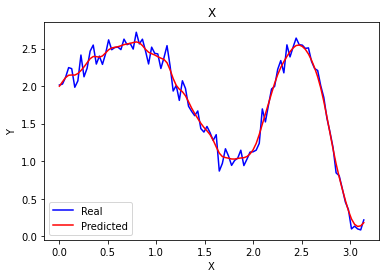

In [8]:
X_l = xs
Y_l = ys
Y_p = Y_prediction_05

plt.plot(X_l,Y_l,'b-')
plt.plot(X_l,Y_p,'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X')
plt.legend(['Real','Predicted'])

## Part 2

Use on DataSet

In [9]:
# Read Data and make DataFrame
df = pd.read_csv('data/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

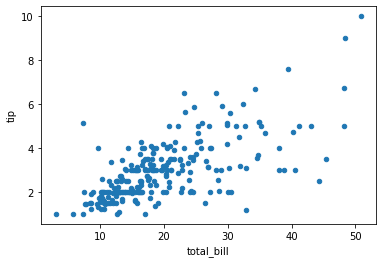

In [10]:
#plot total_bill vs tip
df.plot(x = 'total_bill',y = 'tip',kind = 'scatter')

In [11]:
# select columns regression
X = np.mat(df['total_bill'])
Y = np.mat(df['tip'])

#add 1 with each entry in X
m = X.shape[1]
one = np.ones((1,m))
X = np.hstack((one.T,X.T))

print(X[:5])

[[ 1.   16.99]
 [ 1.   10.34]
 [ 1.   21.01]
 [ 1.   23.68]
 [ 1.   24.59]]


In [12]:
Y_prediction = predict(X,Y,0.4)

### Plot the predicted result

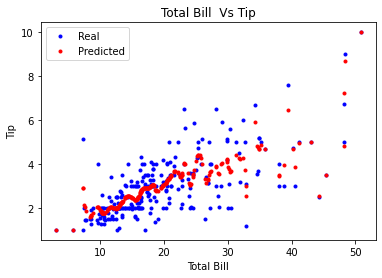

In [13]:
X_l = df['total_bill']
Y_l = df['tip']
Y_p = Y_prediction

plt.plot(X_l,Y_l,'b.')
plt.plot(X_l,Y_p,'r.')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill  Vs Tip')
plt.legend(['Real','Predicted'])